In [1]:
import pandas as pd
results = pd.read_excel('Combined_GIS_Results.xlsx')
sources = pd.read_excel('sources.xlsx')
results = results.drop('Source type 2', axis=1)

In [2]:
selectedsources = pd.read_excel('selectedsources.xlsx', sheet_name='full results')

In [3]:
df_merge = pd.merge(selectedsources, sources, on=['Name'])
df_merge = df_merge.drop_duplicates() 
df_merge = df_merge.drop(['Total_Cost', 'Capacity', 'Capcost', 'Source type_x', 'Ratio'], axis=1)

In [4]:
plotdata = df_merge[['Name', 'Latitude', 'Longitude', 'Source type_y', 'Size']]

In [6]:
import pandas as pd
import plotly.express as px

# Load the network data from Excel
network = pd.read_excel('Network.xlsx')
network['size'] = 1  # Set a smaller size for network points

# Assuming your network DataFrame has 'lat' and 'long' columns
lat_col = 'lat'  # Adjust based on your Excel file
lon_col = 'long'  # Adjust based on your Excel file

# Create a size mapping for specific source types with sizes
size_mapping = {
    'Data Center': 10,       # Larger marker for Data Center
    'Ice rink': 10,          # Larger marker for Ice rink
    'Sewage plant': 10,      # Larger marker for Sewage plant
    'supermarket': 5,        # Smaller marker for supermarket
    'Subway station': 7.5    # Smaller marker for Subway station
}

# Define colors and source types
colors = {
    'Data Center': '#0000CC',    # Dark blue for Data Center
    'Ice rink': '#006600',       # Dark green for Ice rink
    'Sewage plant': '#6A5ACD',   # Dark orange for Sewage plant
    'supermarket': '#990000',    # Dark red for supermarket
    'Subway station': '#FF0000'  # Bright red for Subway station
}

# List of source types to iterate over
source_types = ['supermarket', 'Ice rink', 'Data Center', 'Sewage plant', 'Subway station']

# Create the scatter mapbox figure for each source type
for source_type in source_types:
    # Filter the DataFrame for the current source type, ensuring case sensitivity
    plotdata1 = plotdata[plotdata['Source type_y'] == source_type].copy()
    plotdata1['Marker Size'] = size_mapping.get(source_type, 5)  # Assign marker size based on type

    # Create the scatter mapbox figure for the network
    fig = px.scatter_mapbox(
        network,
        lat=lat_col,
        lon=lon_col,
        color_discrete_sequence=['black'],  # Black for network markers
        size=network['size'],
        size_max=3,  # Set max size for network markers to keep them small
        mapbox_style='open-street-map',  # Open Street Map style
        opacity=0.6  # Slightly transparent network markers
    )

    # Add source type markers to the map
    fig.add_scattermapbox(
        lat=plotdata1['Latitude'],
        lon=plotdata1['Longitude'],
        mode='markers',
        marker=dict(
            size=plotdata1['Marker Size'],
            color=colors[source_type],
            opacity=0.9
        ),
        name=source_type  # Name each layer by source type
    )

    # Update layout to reduce white space and position the legend
    fig.update_layout(
        width=500,
        height=540,  # Map dimensions
        margin=dict(l=10, r=10, t=10, b=10),  # Minimal margin around the map
        legend=dict(
            x=0.99,  # Position on the right
            y=0.99,  # Position at the top
            bgcolor="rgba(255, 255, 255, 0)",  # Fully transparent background
            bordercolor="black",
            borderwidth=1,
            xanchor='right',  # Anchor the x position to the right
            yanchor='top',    # Anchor the y position to the top
            font=dict(
                family="Arial Black, sans-serif",  # Preferred font family
                size=12,                          # Font size
                color="rgba(0, 0, 0, 1)",         # Dark text color (black)
            )
        ),
        mapbox_center={"lat": 59.4011227, "lon": 17.9428223}
    )

    # Show and save each figure
    fig.show()
    fig.write_html(f"map_plot_{source_type}.html")


In [ ]:
import pandas as pd
import plotly.express as px

# Load the network data from Excel
network = pd.read_excel('Network.xlsx')
network['size'] = 1  # Set a smaller size for network points

# Assuming your network DataFrame has 'lat' and 'long' columns
lat_col = 'lat'  # Adjust based on your Excel file
lon_col = 'long'  # Adjust based on your Excel file

# Create a size mapping for specific source types with sizes
size_mapping = {
    'Data Center': 10,       # Larger marker for Data Center
    'Ice rink': 10,          # Larger marker for Ice rink
    'Sewage plant': 10,      # Larger marker for Sewage plant
    'supermarket': 5,        # Smaller marker for supermarket
    'Subway station': 7.5    # Smaller marker for Subway station
}

# Define colors and source types
colors = colors = {
    'Data Center': '#0000CC',    # Dark blue for Data Center
    'Ice rink': '#006600',       # Dark green for Ice rink
    'Sewage plant': '#CC5500',   # Dark orange for Sewage plant
    'supermarket': '#990000',    # Dark red for supermarket
    'Subway station': '#FF0000'   # Bright red for Subway station
}


# List of source types to iterate over
source_types = ['supermarket', 'Ice rink', 'Data Center', 'Sewage plant', 'Subway station']



# Create the scatter mapbox figure for the network
fig = px.scatter_mapbox(
    network,
    lat=lat_col,
    lon=lon_col,
    color_discrete_sequence=['black'],  # Black for network markers
    size=network['size'],
    size_max=3,  # Set max size for network markers to keep them small
    zoom=8,
    title=f'Sources and Network: {source_type}',
    mapbox_style='open-street-map',  # Light map style
    opacity=0.6  # Slightly transparent network markers
)

# Update layout to place the legend on the map
fig.update_layout(
width=500, 
height=540,  # Map dimensions
legend=dict(
    x=0.99,  # Position on the right
    y=0.99,  # Position at the top
    bgcolor="rgba(255, 255, 255, 0)",  # Fully transparent background
    bordercolor="black",
    borderwidth=1,
    xanchor='right',  # Anchor the x position to the right
    yanchor='top',     # Anchor the y position to the top
    font=dict(
        family="Arial Black, sans-serif",  # Change to your preferred font family
        size=12,                     # Change font size
        color="rgba(0, 0, 0, 1)",    # Dark text color (black)
        )
    )
)


fig.update_layout(mapbox_center={"lat": 59.4011227, "lon": 17.9428223})

# Show and save each figure
fig.show()
fig.write_html("Network.html")


In [ ]:
import pandas as pd
import plotly.express as px

# Define plotdata as in the provided code
plotdata = df_merge[['Name', 'Latitude', 'Longitude', 'Source type_y', 'Size']]

# Create a size mapping for specific source types
size_mapping = {
    'Data Center': 5,       # Marker size for Data Center
    'Ice rink': 5,          # Marker size for Ice rink
    'Sewage plant': 5,      # Marker size for Sewage plant
    'supermarket': 3,       # Smaller marker for supermarket
    'Subway station': 4     # Marker size for Subway station
}

# Define colors for each source type
colors = {
    'Data Center': '#0000CC',    # Dark blue for Data Center
    'Ice rink': '#006600',       # Dark green for Ice rink
    'Sewage plant': '#6A5ACD',   # Dark orange for Sewage plant
    'supermarket': '#990000',    # Dark red for supermarket
    'Subway station': '#FF0000'  # Bright red for Subway station
}

# Plot Data Center and Ice rink combined
combined_types1 = ['Data Center', 'Ice rink']
plotdata_combined1 = plotdata[plotdata['Source type_y'].isin(combined_types1)].copy()

if not plotdata_combined1.empty:
    plotdata_combined1['Marker Size'] = plotdata_combined1['Source type_y'].map(size_mapping)

    fig_combined1 = px.scatter_mapbox(
        plotdata_combined1,
        lat='Latitude',
        lon='Longitude',
        size=plotdata_combined1['Marker Size'],
        size_max=8,
        color='Source type_y',  # Map source types for the legend
        color_discrete_map=colors,
        title='Map of Data Center and Ice rink',
        mapbox_style='open-street-map',
        zoom=8.5
    )

    fig_combined1.update_layout(
        width=500,
        height=540,
        legend_title_text='Source Type',
        legend=dict(
            x=1,
            y=1,
            xanchor='right',
            yanchor='top',
            bgcolor="rgba(255, 255, 255, 0)",  # Transparent background
            bordercolor="black",
            borderwidth=1,
            font=dict(family="Arial Black, sans-serif", size=12, color="black")
        ),
        mapbox=dict(center={"lat": 59.34662, "lon": 18.04708})
    )

    fig_combined1.show()
    fig_combined1.write_html("map_plot_data_center_ice_rink.html")

# Plot Sewage plant and Subway station combined
combined_types2 = ['Sewage plant', 'Subway station']
plotdata_combined2 = plotdata[plotdata['Source type_y'].isin(combined_types2)].copy()

if not plotdata_combined2.empty:
    plotdata_combined2['Marker Size'] = plotdata_combined2['Source type_y'].map(size_mapping)

    fig_combined2 = px.scatter_mapbox(
        plotdata_combined2,
        lat='Latitude',
        lon='Longitude',
        size=plotdata_combined2['Marker Size'],
        size_max=8,
        color='Source type_y',
        color_discrete_map=colors,
        title='Map of Sewage plant and Subway station',
        mapbox_style='open-street-map',
        zoom=8.5
    )

    fig_combined2.update_layout(
        width=500,
        height=540,
        legend_title_text='Source Type',
        legend=dict(
            x=1,
            y=1,
            xanchor='right',
            yanchor='top',
            bgcolor="rgba(255, 255, 255, 0)",
            bordercolor="black",
            borderwidth=1,
            font=dict(family="Arial Black, sans-serif", size=12, color="black")
        ),
        mapbox=dict(center={"lat": 59.34662, "lon": 18.04708})
    )

    fig_combined2.show()
    fig_combined2.write_html("map_plot_sewage_plant_subway_station.html")

# Plot supermarket on its own
plotdata_supermarket = plotdata[plotdata['Source type_y'] == 'supermarket'].copy()

if not plotdata_supermarket.empty:
    plotdata_supermarket['Marker Size'] = size_mapping['supermarket']
    
    fig_supermarket = px.scatter_mapbox(
        plotdata_supermarket,
        lat='Latitude',
        lon='Longitude',
        size=plotdata_supermarket['Marker Size'],
        size_max=5,
        color_discrete_sequence=[colors['supermarket']],
        title='Map of Supermarkets',
        mapbox_style='open-street-map',
        zoom=8.5
    )

    fig_supermarket.update_layout(
        width=500,
        height=540,
        legend_title_text='Source Type',
        legend=dict(
            x=1,
            y=1,
            xanchor='right',
            yanchor='top',
            bgcolor="rgba(255, 255, 255, 0)",
            bordercolor="black",
            borderwidth=1,
            font=dict(size=12, color="black")
        ),
        mapbox=dict(center={"lat": 59.34662, "lon": 18.04708})
    )

    fig_supermarket.show()
    fig_supermarket.write_html("map_plot_supermarket.html")


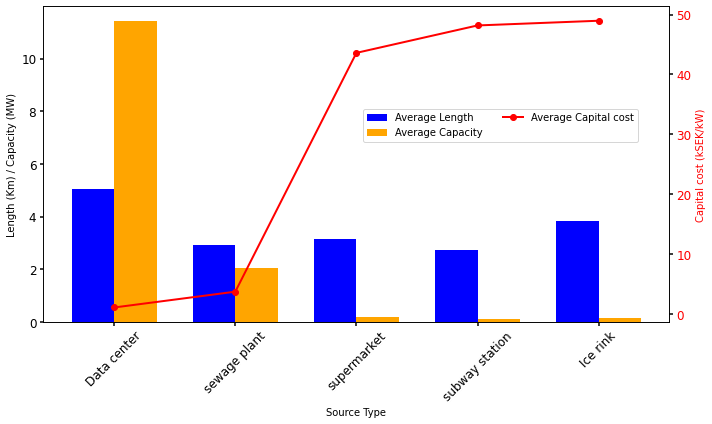

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Read excel sheet
df = pd.read_excel('Combined_GIS_Results.xlsx', sheet_name='comparison')
df.sort_values(by='Average Capital cost', ascending=True, inplace=True)

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Define bar width and position for each group
bar_width = 0.35
index = range(len(df))

# Plot Average Length and Average Capacity as bars on the primary y-axis
ax1.bar([i - bar_width / 2 for i in index], df['Average Length'], width=bar_width, label='Average Length', color='blue')
ax1.bar([i + bar_width / 2 for i in index], df['Average Capacity'], width=bar_width, label='Average Capacity', color='orange')
ax1.set_xlabel('Source Type')
ax1.set_ylabel('Length (Km) / Capacity (MW)', color='black')
ax1.set_xticks(index)
ax1.set_xticklabels(df['Source Type'], rotation=45)

# Create a secondary y-axis for Average Capacity
ax2 = ax1.twinx()
ax2.plot(index, df['Average Capital cost'], color='red', marker='o', linewidth=2, label='Average Capital cost')  # Line width increased
ax2.set_ylabel('Capital cost (kSEK/kW)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Combine legends without creating individual legends on each axis
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines += lines2
labels += labels2
fig.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.7, 0.75), ncol=2)  # Centered at the top



# Adjust tick parameters
ax1.tick_params(axis='both', which='major', labelsize=12, width=1.5)
ax2.tick_params(axis='both', which='major', labelsize=12, width=1.5)

# Customize title and layout
plt.tight_layout()
plt.savefig('comparison_plot.png', bbox_inches='tight')
plt.show()

In [10]:
df

,Source Type,Average Length,Average Capital cost,Average Capacity
0,Data center,3.992096,24.547840,4.925550
1,Ice rink,3.688360,46.333358,1.912015
2,sewage plant,1.319740,26.856135,0.125571
3,subway station,3.270027,39.802562,1.359358
4,supermarket,3.110364,43.023915,0.598870
